In [1]:
from keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Conv1D,MaxPooling2D,Dropout,BatchNormalization,AveragePooling2D,Input
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical 
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.datasets import mnist

In [2]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()
print(x_train.shape)
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=6)
print (x_val.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(12000, 28, 28, 1)


In [3]:
y_train=to_categorical(y_train, num_classes = 10)
y_val=to_categorical(y_val, num_classes = 10)
y_test=to_categorical(y_test, num_classes = 10)

In [4]:
imagegen = image.ImageDataGenerator(rescale=1/255)
train_batch = imagegen.flow(x_train, y_train,batch_size=96)
val_batch = imagegen.flow(x_val,y_val)
test_batch = imagegen.flow(x_test,y_test)

In [5]:
def model (shape, classes):
    input = Input(shape)
    X = Conv2D(32, (5, 5))(input)
    X = Conv2D(32, (5, 5))(X)
    X = MaxPooling2D(pool_size=(2,2))(X)
    X = Dropout(0.25)(X)
    X = Conv2D(32, (3, 3))(X)
    X = Conv2D(32, (3, 3))(X)
    X = MaxPooling2D(pool_size=(2,2))(X)
    X = Dropout(0.25)(X)
    X = Flatten()(X)
    X = Dense(256, activation = "relu")(X)
    X = Dense(10, activation = "softmax")(X)
    model = Model(inputs=input,outputs=X, name ='mynet')
    return model
mymodel = model((28,28,1), 10)
mymodel.summary()
mymodel.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])
history = mymodel.fit(train_batch,epochs = 10,validation_data=val_batch)

Model: "mynet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          9248  

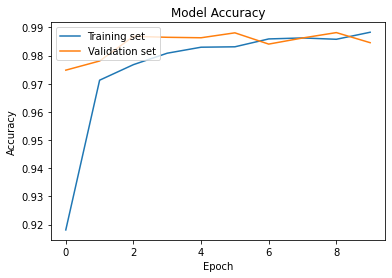

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [7]:
mymodel.save("Test Model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Test Model\assets
